In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


/home/wiredu/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Documentation for keras is located at https://keras.io

### Loading MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [5]:
train_images.shape

(60000, 784)

In [6]:
def plot_digit(x):
    x = np.reshape(x, (28, 28))
    plt.imshow(1.0-x, cmap='gray', vmin=0, vmax=1)

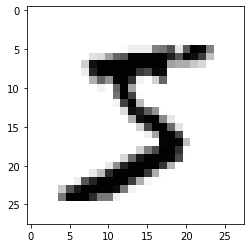

In [7]:
plot_digit(train_images[0])

### Model 1: Fully connected, 30 hidden neurons

First define the layers.

In [8]:
model_fc_30 = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])

Then "compile" the model, choosing loss and optimization algorithm.

Default activation is identity, so `Dense(10)` is a linear layer without applying any activation.

In [9]:
model_fc_30.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

`adam` is one of the most popular optimizers. It is SGD with some modifications.

`from_logits=False` means that the inputs to the loss are log-likelihoods. Then, the loss is what the book called softmax + log-likelihood loss.

If the dense layer already applied softmax, so the inputs are probabilities, then you should call `from_logits=True`.

The last part is to run SGD for a number of epochs:

In [10]:
model_fc_30.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.5929 - accuracy: 0.8669
Epoch 2/10
1875/1875 [==============================] - 1s 613us/step - loss: 0.2592 - accuracy: 0.9289
Epoch 3/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.2077 - accuracy: 0.9426
Epoch 4/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.1786 - accuracy: 0.9499
Epoch 5/10
1875/1875 [==============================] - 1s 613us/step - loss: 0.1586 - accuracy: 0.9556
Epoch 6/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.1438 - accuracy: 0.9594
Epoch 7/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.1317 - accuracy: 0.9631
Epoch 8/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.1220 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 1s 615us/step - loss: 0.1133 - accuracy: 0.9682
Epoch 10/10
1875/1875 [==============================] - 1s 615u

Evaluate accuracy on the test data

In [11]:
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.1311 - accuracy: 0.9605 - 213ms/epoch - 681us/step


We can keep training the same model from the last place

In [12]:
model_fc_30.fit(train_images, train_labels, epochs=20)
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 1s 639us/step - loss: 0.1007 - accuracy: 0.9719
Epoch 2/20
1875/1875 [==============================] - 1s 624us/step - loss: 0.0949 - accuracy: 0.9733
Epoch 3/20
1875/1875 [==============================] - 1s 615us/step - loss: 0.0899 - accuracy: 0.9748
Epoch 4/20
1875/1875 [==============================] - 1s 625us/step - loss: 0.0861 - accuracy: 0.9751
Epoch 5/20
1875/1875 [==============================] - 1s 621us/step - loss: 0.0819 - accuracy: 0.9767
Epoch 6/20
1875/1875 [==============================] - 1s 612us/step - loss: 0.0786 - accuracy: 0.9778
Epoch 7/20
1875/1875 [==============================] - 1s 614us/step - loss: 0.0749 - accuracy: 0.9793
Epoch 8/20
1875/1875 [==============================] - 1s 615us/step - loss: 0.0718 - accuracy: 0.9798
Epoch 9/20
1875/1875 [==============================] - 1s 617us/step - loss: 0.0688 - accuracy: 0.9807
Epoch 10/20
1875/1875 [==============================] - 1s 616u

### Model 2: Fully connected, 100 hidden neurons

In [13]:
model_fc_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])
model_fc_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_fc_100.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 772us/step - loss: 0.4226 - accuracy: 0.8935
Epoch 2/30
1875/1875 [==============================] - 2s 808us/step - loss: 0.2027 - accuracy: 0.9423
Epoch 3/30
1875/1875 [==============================] - 1s 781us/step - loss: 0.1517 - accuracy: 0.9567
Epoch 4/30
1875/1875 [==============================] - 1s 781us/step - loss: 0.1206 - accuracy: 0.9648
Epoch 5/30
1875/1875 [==============================] - 1s 757us/step - loss: 0.0995 - accuracy: 0.9715
Epoch 6/30
1875/1875 [==============================] - 1s 782us/step - loss: 0.0837 - accuracy: 0.9764
Epoch 7/30
1875/1875 [==============================] - 1s 783us/step - loss: 0.0714 - accuracy: 0.9796
Epoch 8/30
1875/1875 [==============================] - 1s 793us/step - loss: 0.0615 - accuracy: 0.9834
Epoch 9/30
1875/1875 [==============================] - 1s 762us/step - loss: 0.0530 - accuracy: 0.9858
Epoch 10/30
1875/1875 [==============================] - 1s 759u

In [14]:
model_fc_100.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0980 - accuracy: 0.9760 - 212ms/epoch - 676us/step


[0.09797811508178711, 0.9760000109672546]

### Adjust the data for convolution

In [15]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
test_images_conv = test_images.reshape((10000, 28, 28, 1))

### Model 3: 20 filters, 2x2 max pooling, 100 hidden neurons, ReLU

In [16]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_1.fit(train_images_conv, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1552 - accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0549 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0370 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

In [17]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9868 - loss: 0.0491


[0.04909982904791832, 0.9868000149726868]

In [18]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9984 - loss: 0.0047
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9989 - loss: 0.0034
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9986 - loss: 0.0042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0038
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0030


In [19]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - 883us/step - accuracy: 0.9884 - loss: 0.0496


[0.0495745912194252, 0.9883999824523926]

In [20]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9997 - loss: 0.0011
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9991 - loss: 0.0034
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0020
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9995 - loss: 0.0018


In [21]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - 893us/step - accuracy: 0.9885 - loss: 0.0615


[0.06153154373168945, 0.9884999990463257]

### Model 4: 20 filters, 2x2 pooling, 40 filters, 2x2 pooling, 100 hidden neurons 

In [22]:
model_cnn_test = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_cnn_test.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model_cnn_test.fit(train_images_conv, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9019 - loss: 0.3220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9858 - loss: 0.0481
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0226
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9947 - loss: 0.0169
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9962 - loss: 0.0122
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9968 - loss: 0.0100
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9974 - loss: 0.0073
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9980 - loss: 0.0062


In [23]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_2.fit(train_images_conv, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8953 - loss: 0.3394
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9849 - loss: 0.0475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9912 - loss: 0.0295
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9922 - loss: 0.0218
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9949 - loss: 0.0173
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9956 - loss: 0.0141
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9973 - loss: 0.0085
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9976 - loss: 0.0076
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9980 - loss: 0.0070


In [24]:
model_cnn_2.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9917 - loss: 0.0306


[0.030565990135073662, 0.9916999936103821]

In [25]:
model_cnn_2.fit(train_images_conv, train_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9979 - loss: 0.0064
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9979 - loss: 0.0058
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9985 - loss: 0.0045


In [26]:
model_cnn_2.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9902 - loss: 0.0426


[0.04258476570248604, 0.9901999831199646]

### Expand the training dataset

In [17]:
IMG_LEN = 28
IMG_SIZE = IMG_LEN**2
def shifted_image(img, shift_r, shift_c):
    res = np.zeros_like(img)
    for row in range(IMG_LEN):
        new_row = row + shift_r
        if new_row >= 0 and new_row < IMG_LEN:
            for col in range(IMG_LEN):
                new_col = col + shift_c
                if new_col >= 0 and new_col < IMG_LEN:
                    res[new_row, new_col] = img[row, col]
    return res
def expand_dataset(images, labels):
    res_images = []
    res_labels = []
    for i in range(len(images)):
        x = images[i].reshape((IMG_LEN, IMG_LEN))
        y = labels[i]
        res_images.append(x)
        res_labels.append(y)
        for shift_r, shift_c in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            res_images.append(shifted_image(x, shift_r, shift_c))
            res_labels.append(y)
    return np.array(res_images), np.array(res_labels)

In [18]:
expanded_images, expanded_labels = expand_dataset(train_images, train_labels)

In [19]:
expanded_images.shape, expanded_labels.shape

((300000, 28, 28), (300000,))

In [20]:
expanded_images_conv = expanded_images.reshape((300000, 28, 28, 1))

### Model 5: M4 trained on the expanded data

In [21]:
model_expanded = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_expanded.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_expanded.fit(expanded_images_conv, expanded_labels, epochs=10)

Epoch 1/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0622 - accuracy: 0.9805
Epoch 2/10
9375/9375 [==============================] - 37s 4ms/step - loss: 0.0188 - accuracy: 0.9939
Epoch 3/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 4/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 5/10
9375/9375 [==============================] - 37s 4ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 6/10
9375/9375 [==============================] - 37s 4ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 7/10
9375/9375 [==============================] - 37s 4ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 8/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 9/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0055 - accuracy: 0.9985
Epoch 10/10
9375/9375 [==============================] - 37s 4ms/step - l

In [22]:
model_expanded.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0475 - accuracy: 0.9927 - 370ms/epoch - 1ms/step


[0.047481752932071686, 0.9926999807357788]

In [23]:
model_expanded.fit(expanded_images_conv, expanded_labels, epochs=5)

Epoch 1/5
9375/9375 [==============================] - 37s 4ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 2/5
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 3/5
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0048 - accuracy: 0.9989
Epoch 4/5
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 5/5
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0045 - accuracy: 0.9989


In [24]:
model_expanded.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0566 - accuracy: 0.9939 - 294ms/epoch - 940us/step


[0.05656394734978676, 0.9939000010490417]

### Model 6:  Two fully connected layers

In [25]:
model_cnn_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_3.fit(expanded_images_conv, expanded_labels, epochs=10)

Epoch 1/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0641 - accuracy: 0.9800
Epoch 2/10
9375/9375 [==============================] - 38s 4ms/step - loss: 0.0214 - accuracy: 0.9934
Epoch 3/10
9375/9375 [==============================] - 40s 4ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 4/10
9375/9375 [==============================] - 40s 4ms/step - loss: 0.0112 - accuracy: 0.9966
Epoch 5/10
9375/9375 [==============================] - 40s 4ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 6/10
9375/9375 [==============================] - 39s 4ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 7/10
9375/9375 [==============================] - 42s 4ms/step - loss: 0.0075 - accuracy: 0.9979
Epoch 8/10
9375/9375 [==============================] - 42s 4ms/step - loss: 0.0072 - accuracy: 0.9978
Epoch 9/10
9375/9375 [==============================] - 41s 4ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 10/10
9375/9375 [==============================] - 42s 5ms/step - l

In [34]:
model_cnn_3.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9927 - loss: 0.0468


[0.04682439565658569, 0.9926999807357788]

### Model 7: Adding dropout to the fully connected layers (now with 1000 neurons) 

In [35]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_dropout.fit(expanded_images_conv, expanded_labels, epochs=10)

Epoch 1/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.9274 - loss: 0.2289
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9792 - loss: 0.0747
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9814 - loss: 0.0686
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9825 - loss: 0.0668
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9823 - loss: 0.0683
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9832 - loss: 0.0653
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.9835 - loss: 0.0672
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9831 - loss: 0.0681
Epoch 9/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9824 - loss: 0.0701
Epoch 10/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - accuracy: 0.9831 - loss: 0.0705


In [36]:
model_dropout.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9937 - loss: 0.0254


[0.025419406592845917, 0.9937000274658203]

In [37]:
model_dropout.fit(expanded_images_conv, expanded_labels, epochs=10)

Epoch 1/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9838 - loss: 0.0686
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - accuracy: 0.9838 - loss: 0.0661
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9839 - loss: 0.0637
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.9830 - loss: 0.0707
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9833 - loss: 0.0671
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9832 - loss: 0.0686
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9842 - loss: 0.0642
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.9830 - loss: 0.0666
Epoch 9/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9833 - loss: 0.0661
Epoch 10/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9835 - loss: 0.0668


In [38]:
model_dropout.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9931 - loss: 0.0298


[0.02975008636713028, 0.9930999875068665]

In [39]:
model_dropout.fit(expanded_images_conv, expanded_labels, epochs=10)

Epoch 1/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9834 - loss: 0.0668
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9833 - loss: 0.0668
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9834 - loss: 0.0705
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9830 - loss: 0.0689
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.9831 - loss: 0.0702
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9833 - loss: 0.0677
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9833 - loss: 0.0675
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9827 - loss: 0.0710
Epoch 9/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9828 - loss: 0.0700
Epoch 10/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9825 - loss: 0.0709


### Visualizing the architecture

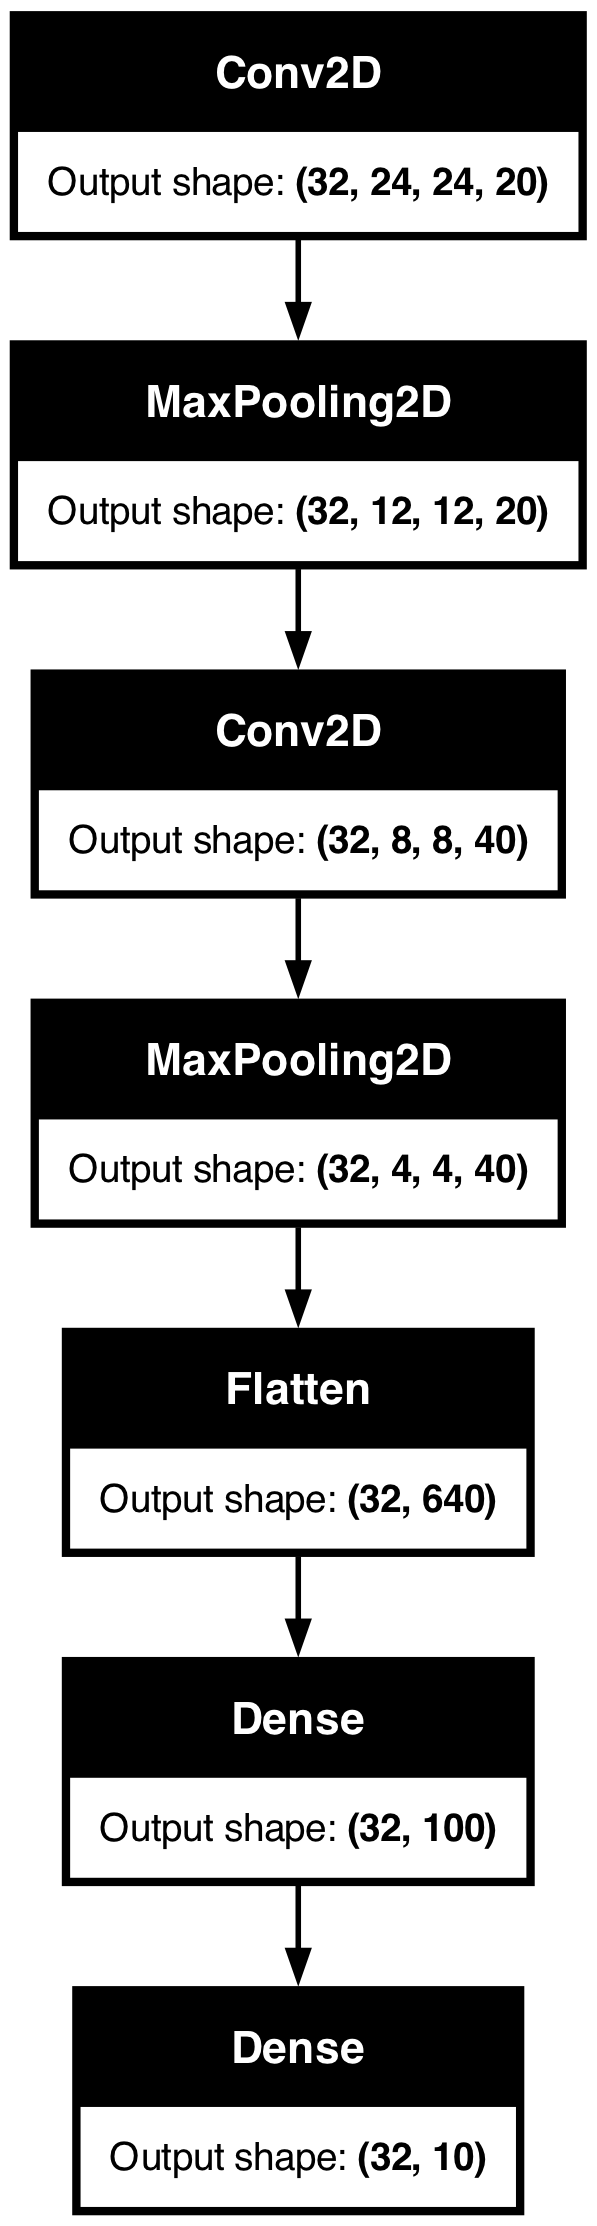

In [27]:
tf.keras.utils.plot_model(model_cnn_2, show_shapes=True)

### Making predictions

In [77]:
result = model_cnn_2.predict(test_images_conv)
result.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

Predict method expects a batch of inputs. For predicting just one input, an additional dimension must be added. Otherwise, we will see an error as below:

In [60]:
model_cnn_2.predict(test_images_conv[0])

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [61]:
test_images_conv[0].shape

(28, 28, 1)

In [62]:
test_images_conv[0][np.newaxis].shape

(1, 28, 28, 1)

In [68]:
model_cnn_2.predict(test_images_conv[0][np.newaxis])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ -6.1698747,  -7.0366464,  -4.564928 ,  -6.637397 ,   3.0430787,
         -9.242972 , -16.61522  ,  17.55662  ,  -6.0331907,  -6.0656714]],
      dtype=float32)

In [74]:
scipy.special.softmax( model_cnn_2.predict(test_images_conv[0][np.newaxis]) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[4.9626591e-11, 2.0858365e-11, 2.4702090e-10, 3.1093697e-11,
        4.9756397e-07, 2.2965995e-12, 1.4433099e-15, 9.9999952e-01,
        5.6895214e-11, 5.5076825e-11]], dtype=float32)

You can also call the model directly, which returns a tensor. Using ``predict`` is recommended, especially for large datasets.

In [76]:
model_cnn_2(test_images_conv)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[ -6.1698747,  -7.0366488,  -4.5649285, ...,  17.556622 ,
         -6.033191 ,  -6.065671 ],
       [ -2.52895  ,   7.295877 ,  22.997427 , ..., -14.005012 ,
        -10.791811 , -18.891079 ],
       [ -5.2490454,  13.57429  ,  -4.806515 , ...,  -4.9679976,
         -3.517116 , -10.015733 ],
       ...,
       [-17.869184 ,  -1.979038 , -12.703198 , ...,  -7.126138 ,
         -2.440142 ,  -5.9676013],
       [-10.55724  , -16.919859 , -20.8488   , ...,  -7.371537 ,
          2.213465 ,  -7.501013 ],
       [ -6.2678285,  -5.5694246,  -6.4810276, ..., -15.518519 ,
         -2.753694 , -13.34269  ]], dtype=float32)>

### Visualizing the layer weights

In [28]:
Lconv_1 = model_cnn_2.layers[0]
Lconv_1

<Conv2D name=conv2d_3, built=True>

In [29]:
weights, biases = Lconv_1.get_weights()

In [31]:
weights.shape, biases.shape

((5, 5, 1, 20), (20,))

In [32]:
def plot_filter(weights, ind):
    F = weights[:, :, 0, ind]
    plt.imshow(F)
    plt.colorbar()
    plt.show()

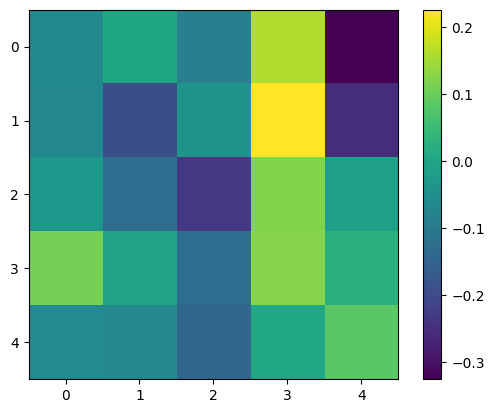

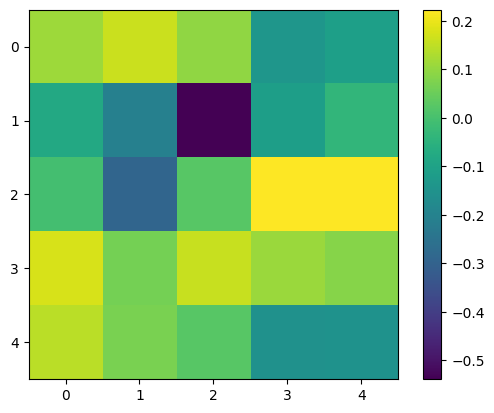

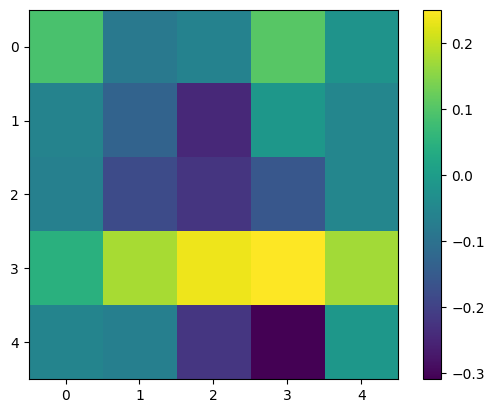

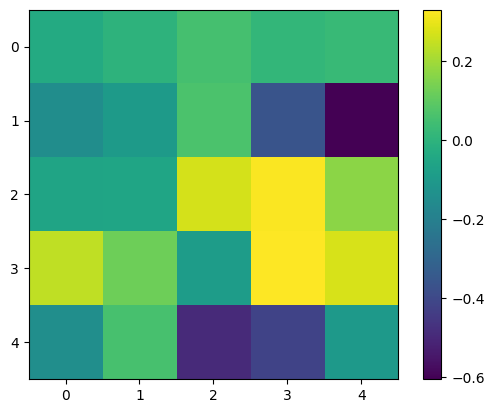

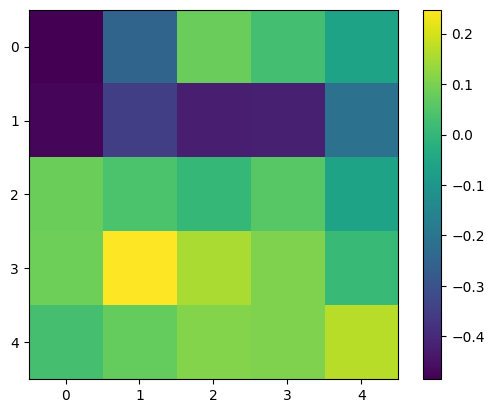

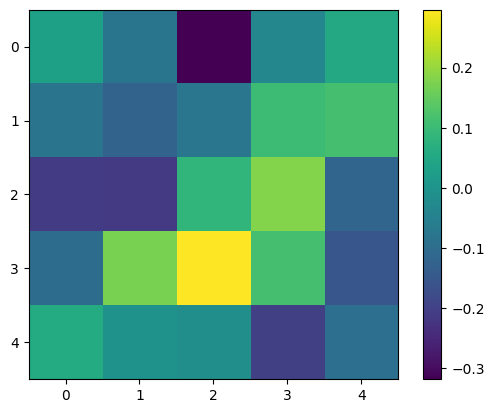

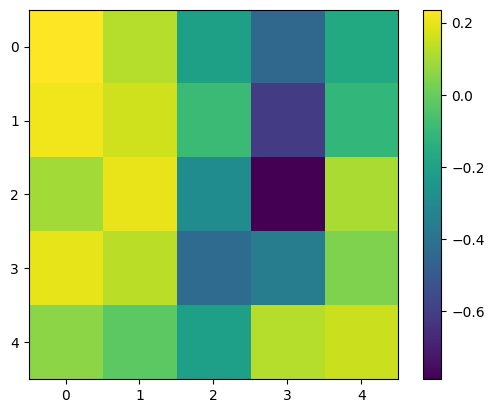

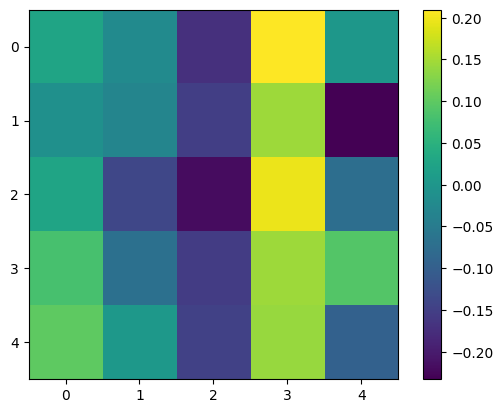

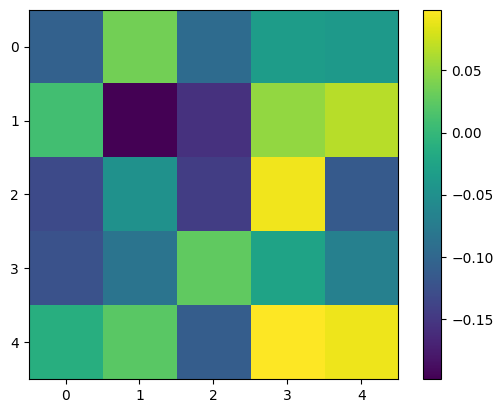

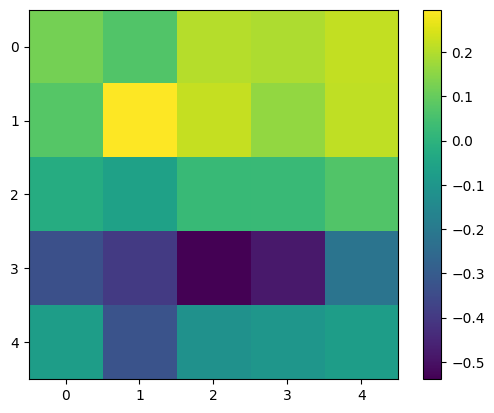

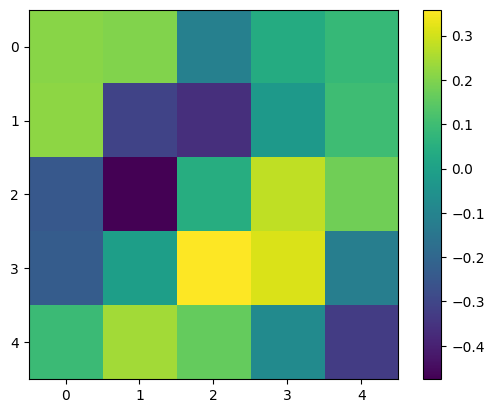

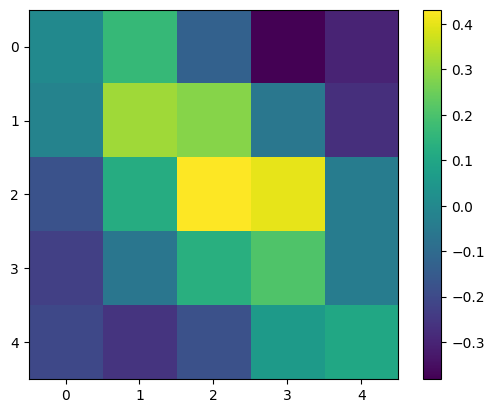

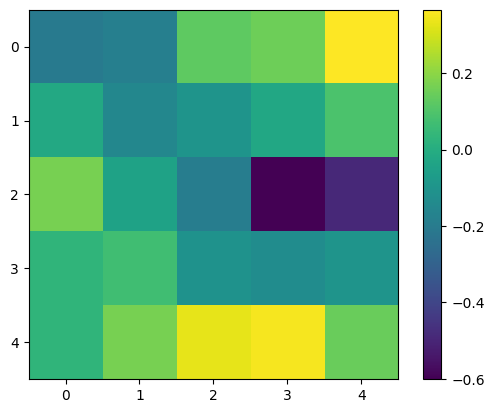

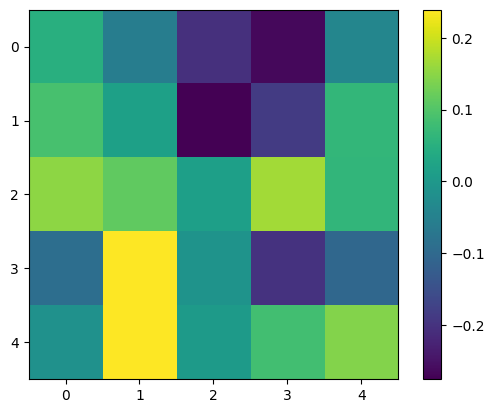

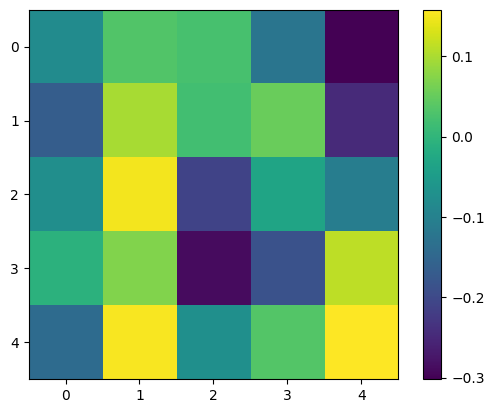

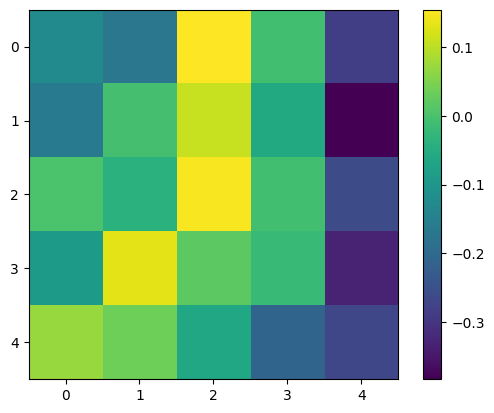

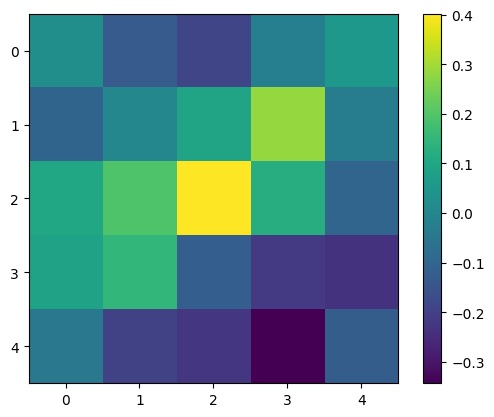

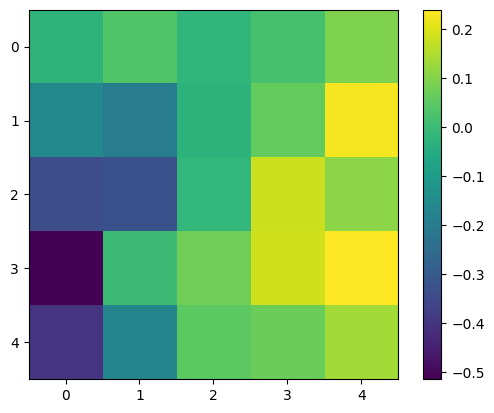

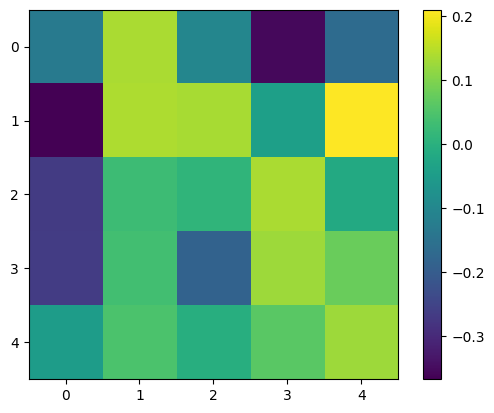

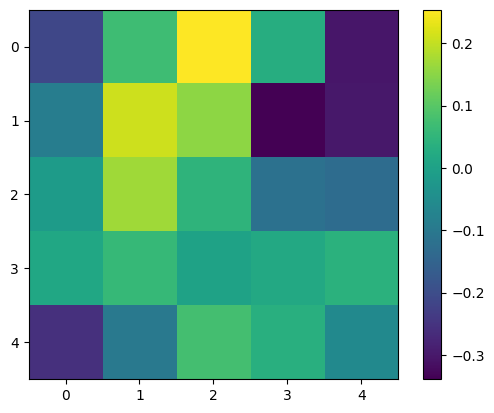

In [33]:
for i in range(20):
    plot_filter(weights, i)

### Tracking accuracy on test data

In [44]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model_cnn_2.fit(train_images_conv, train_labels, 
                          validation_data=(test_images_conv, test_labels), 
                          epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9076 - loss: 0.3072 - val_accuracy: 0.9862 - val_loss: 0.0427
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9869 - val_loss: 0.0396
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9891 - val_loss: 0.0311
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9921 - val_loss: 0.0260
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9912 - val_loss: 0.0264
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9932 - val_loss: 0.0248
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9980 - loss: 0.0064 - 

In [47]:
history.history

{'accuracy': [0.9591833353042603,
  0.986466646194458,
  0.9897000193595886,
  0.9931666851043701,
  0.9943166375160217,
  0.9953500032424927,
  0.9957500100135803,
  0.9971500039100647,
  0.9969833493232727,
  0.9973999857902527,
  0.9976833462715149,
  0.9983500242233276,
  0.9979000091552734,
  0.9980499744415283,
  0.9978833198547363,
  0.9988666772842407,
  0.9986000061035156,
  0.9981833100318909,
  0.9987000226974487,
  0.9987499713897705],
 'loss': [0.1361154168844223,
  0.04430285096168518,
  0.03162498399615288,
  0.02153766341507435,
  0.01789221726357937,
  0.01451146975159645,
  0.012721448205411434,
  0.008901972323656082,
  0.008762582205235958,
  0.008075610734522343,
  0.006924950052052736,
  0.0049013402312994,
  0.006385773420333862,
  0.005532186012715101,
  0.006138933356851339,
  0.003860341152176261,
  0.003768571652472019,
  0.005629474297165871,
  0.004208788275718689,
  0.004351911135017872],
 'val_accuracy': [0.9861999750137329,
  0.9868999719619751,
  0.9890

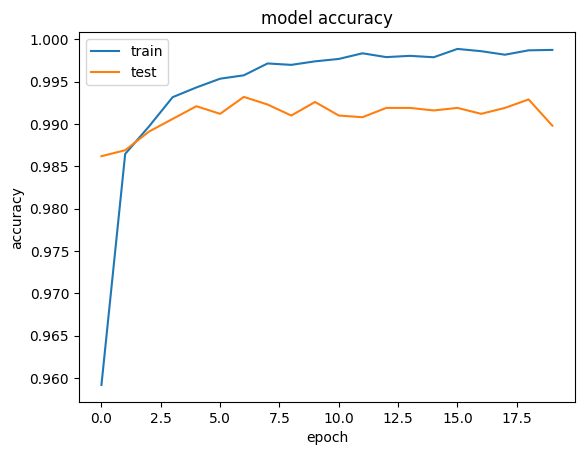

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

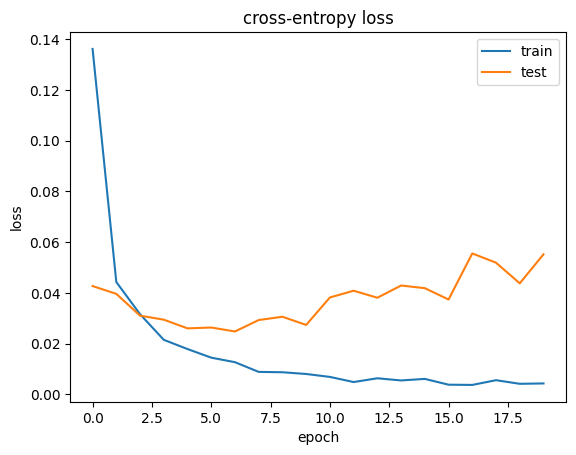

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cross-entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Tracking the weight change

In [50]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
N_EPOCHS = 10

b1_L2 = []
b2_L2 = []

for i in range(N_EPOCHS):
    model_cnn_2.fit(train_images_conv, train_labels, epochs=1)

    b1 = model_cnn_2.layers[0].get_weights()[1]
    b2 = model_cnn_2.layers[2].get_weights()[1]
    
    b1_L2.append(np.linalg.norm(b1)**2 / b1.size)
    b2_L2.append(np.linalg.norm(b2)**2 / b2.size)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9066 - loss: 0.3116
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9853 - loss: 0.0467
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0291
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0203
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0156
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9953 - loss: 0.0153
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9966 - loss: 0.0110
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9977 - loss: 0.0073
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0085
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9979 - loss: 0.0066


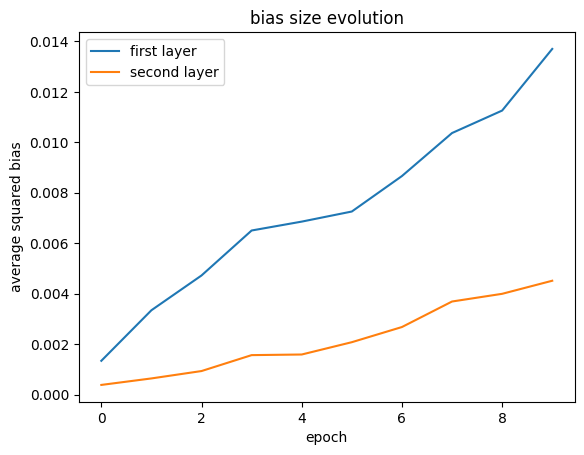

In [52]:
plt.plot(b1_L2)
plt.plot(b2_L2)
plt.legend(['first layer', 'second layer'])
plt.ylabel('average squared bias')
plt.xlabel('epoch')
plt.title('bias size evolution')
plt.show()

### Computing the gradients directly in tensorflow

The object used to compute gradients in tensorflow is called ``GradientTape``

In [90]:
with tf.GradientTape() as tape:
    result = model_cnn_2(train_images_conv[:128])
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    loss = loss_fn(train_labels[:128], result)
gradients = tape.gradient(loss, model_cnn_2.trainable_variables)

In [96]:
for i, g in enumerate(gradients):
    print('index %d: shape %s' % (i, g.shape))

index 0: shape (5, 5, 1, 20)
index 1: shape (20,)
index 2: shape (5, 5, 20, 40)
index 3: shape (40,)
index 4: shape (640, 100)
index 5: shape (100,)
index 6: shape (100, 10)
index 7: shape (10,)


As you can see the gradients are given as a list. For each trainable layer there are
two elements, first weights, then biases.

In [82]:
result.shape

TensorShape([128, 10])

### Model 8: Variable learning rate

In [52]:
model_dropout_variableLR = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])
model_dropout_variableLR.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
history = model_dropout_variableLR.fit(expanded_images_conv, expanded_labels, epochs=40, 
                  validation_data=(test_images_conv, test_labels),
                  callbacks=[reduce_lr])

Epoch 1/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9311 - loss: 0.2173 - val_accuracy: 0.9916 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 2/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.9798 - loss: 0.0717 - val_accuracy: 0.9927 - val_loss: 0.0310 - learning_rate: 0.0010
Epoch 3/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9821 - loss: 0.0664 - val_accuracy: 0.9925 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 4/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9832 - loss: 0.0628 - val_accuracy: 0.9934 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 5/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9846 - loss: 0.0618 - val_accuracy: 0.9937 - val_loss: 0.0293 - learning_rate: 0.0010
Epoch 6/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - accuracy: 0.9841 - loss: 0.0654 - val_accuracy: 0.9930 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 7/40
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9

KeyboardInterrupt: 

In [ ]:
model_dropout_variableLR = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
])
model_dropout_variableLR.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
history = model_dropout_variableLR.fit(expanded_images_conv, expanded_labels, epochs=30, 
                  validation_data=(test_images_conv, test_labels),
                  callbacks=[reduce_lr])